# State Value Function
Next we will find different ways to compute the Value function given by a stochastic policy $\pi(s) = p(a\mid s)$.
We want to calculate $V_{\pi}(s)$ (the state-value-function given a policy)
![mdp.png](mdp.png)

Here we draw an Markov Decision Process (MDP) with three states $\mathcal{S}=\{s_1,s_2,s_3\}$ and three possible actions $\mathcal{A}=\{a_1,a_2,a_3\}$, moving to state $s_1$, moving to state $s_2$ and moving to state $s_3$.

# Policy Evaluation by Dynamic Programming 

For the MDP represented above we define the state transition probability matrix $\mathcal{P}^a_{ss'}=p(S_{t+1}=s'\mid S_{t}=s, A_t=a)$. In this MDP we assume that when we choose to move to state $s_i$, $i=\{1,2,3\}$ we always end up in that state, meaning that $\mathcal{P}^a_{ss'}=p(S_{t+1}=s'\mid S_{t}=s, A_t=a)=1$. In this case, $\mathcal{P}^{\pi}=\mathcal{P}^a_{ss'}\pi(a\mid s) = \pi(a\mid s)$ the Bellman Expectation equation becomes (Check page 14 and 16 from the lecture slides.):
$$
V_{\pi}(s) = \sum_{a\in\mathcal{A}} \pi(a\mid s)\left( \mathcal{R}^a_s + \gamma \sum_{s'\in \mathcal{S}}\mathcal{P}^a_{ss'}V_{\pi}(s')\right) = \mathcal{R}^{\pi}+ \gamma \sum_{s'\in \mathcal{S}}\pi(a\mid s)V_{\pi}(s')
$$


In [1]:
import numpy as np

policy = np.array([[0.3, 0.2, 0.5], [0.5, 0.4, 0.1], [0.8, 0.1, 0.1]])
print("This is represents the policy with 3 states and 3 actions p(row=a|col=s):\n", np.matrix(policy))
rewards = np.array([10., 2., 3.])
gamma = 0.1

print('This are the rewards for each action:\n', rewards)
state_value_function = np.array([0 for i in range(3)])
print('Policy evaluation:')
for i in range(20):
    print('V_{}={}'.format(i, state_value_function))
    state_value_function = rewards + gamma * (np.matmul(policy, state_value_function))
print('\nV={}'.format(state_value_function))


This is represents the policy with 3 states and 3 actions p(row=a|col=s):
 [[0.3 0.2 0.5]
 [0.5 0.4 0.1]
 [0.8 0.1 0.1]]
This are the rewards for each action:
 [10.  2.  3.]
Policy evaluation:
V_0=[0 0 0]
V_1=[10.  2.  3.]
V_2=[10.49  2.61  3.85]
V_3=[10.5594  2.6674  3.9038]
V_4=[10.56532   2.673704  3.910464]
V_5=[10.56595688  2.6743188   3.91106728]
V_6=[10.56601845  2.67438127  3.91113041]
V_7=[10.5660247   2.67438748  3.91113659]
V_8=[10.56602532  2.6743881   3.91113722]
V_9=[10.56602538  2.67438816  3.91113728]
V_10=[10.56602539  2.67438817  3.91113729]
V_11=[10.56602539  2.67438817  3.91113729]
V_12=[10.56602539  2.67438817  3.91113729]
V_13=[10.56602539  2.67438817  3.91113729]
V_14=[10.56602539  2.67438817  3.91113729]
V_15=[10.56602539  2.67438817  3.91113729]
V_16=[10.56602539  2.67438817  3.91113729]
V_17=[10.56602539  2.67438817  3.91113729]
V_18=[10.56602539  2.67438817  3.91113729]
V_19=[10.56602539  2.67438817  3.91113729]

V=[10.56602539  2.67438817  3.91113729]


# Policy Evaluation by Linear Programming

The state-value-function can be directly solved through linear programming (as shown on page 15 from the lecture slides):
$$
V_{\pi}(s)=\left(I-\gamma\mathcal{P}^{\pi}\right)^{-1}\mathcal{R}^{\pi}
$$

In [3]:
solution=np.matmul(np.linalg.inv(np.eye(3)-0.1*policy), rewards)
print('Solution by inversion:\nV={}'.format(state_value_function))

Solution by inversion:
V=[10.56602539  2.67438817  3.91113729]


The result stays the same. 

# Policy Evaluation by Monte Carlo Sampling

We can design yet another way of evaluating the value of a given policy $\pi$, see lecture slides pag.20.
The intuition is to incrementally the expected return from sampled episodes, sequences of triplets $\{(s_i,a_i,r_{i})\}_{i=1}^N$. The function $\color{blue}{gt}$ computes the total discounted reward from a list of sequential rewards obtained by sampling the policy: $G_t=r_t+\gamma r_{t+1}+\gamma^2 r_{t+2}+\dots+\gamma^N r_{t+N}$.

The value of a policy can also be computed by looking at its empirical expected cumulative discounted return:
$$
V_{\pi}(s) = \mathbb{E}_{\pi}\left[G_t\mid S_t=s\right]
$$

In [4]:
import random
from collections import defaultdict

reward_counter = np.array([0., 0., 0.])
visit_counter = np.array([0., 0., 0.])
nIterations = 400

def gt(rewardlist, gamma=0.1):
    '''
    Function to calculate the total discounted reward
    >>> gt([10, 2, 3], gamma=0.1)
    10.23
    '''
    total_disc_return = 0
    for (i, value) in enumerate(rewardlist):
        total_disc_return += (gamma ** i) * value
    return total_disc_return


for i in range(nIterations): 
    start_state = random.randint(0, 2)
    next_state = start_state
    rewardlist = []
    occurence = defaultdict(list)
    for i in range(250): #draw samples from the policy recursively over horizon of N=250
        rewardlist.append(rewards[next_state])
        occurence[next_state].append(len(rewardlist) - 1)
        action = np.random.choice(np.arange(0, 3), p=policy[next_state])
        next_state = action

    for state in occurence:
        for value in occurence[state]: #update state value function E[G_t|s]=S(s)/N(s)
            rew = gt(rewardlist[value:]) 
            reward_counter[state] += rew # S(s)
            visit_counter[state] += 1 # N(s)

print("MC policy evaluation V=", reward_counter / visit_counter)

MC policy evaluation V= [10.56382238  2.67013244  3.9077672 ]


As can be seen the result is nearly the same as the state-value-function calculated above.

So far we have seen different ways of given a known policy $\pi(a\mid s)$ how to comput its value $V_{\pi}(s)$. Next, we wish to find the optimal policy $\pi^\ast(s)$ for the MDP in the example.

# Policy Optimization by Q-Learning

This code solves a very easy problem: using the rewards it calculates the optimal action-value-function (page 26 on slides).

It samples a state-action pair randomly, so that all state-action pairs can be seen.

In [6]:
q_table = np.zeros((3, 3)) #state action value function Q-table
gamma = 0.1
alpha = 1.0
for i in range(1001):
    state = random.randint(0, 2)
    action = random.randint(0, 2)
    next_state = action
    reward = rewards[next_state]
    next_q = max(q_table[next_state]) #s.a. value evaluation at the next state
    q_table[state, action] = q_table[state, action] + alpha* (
            reward + gamma * (next_q) - q_table[state, action])  #Q-Table update
    if i % 200 == 0:
        print("Q_{}(s,a)=".format(i),q_table)


Q_0(s,a)= [[0. 2. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
Q_200(s,a)= [[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
Q_400(s,a)= [[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
Q_600(s,a)= [[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
Q_800(s,a)= [[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]
Q_1000(s,a)= [[11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]
 [11.11111111  3.11111111  4.11111111]]


## Score Function Gradient Estimator 

(page 32 on lecture slides).

/home/zam/anaconda3/envs/lxmls/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
/home/zam/anaconda3/envs/lxmls/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  


policy:  [[0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]
 [0.33333334 0.33333334 0.33333334]]
[1.0, 0.2, 0.2, 0.2, 1.0, 0.2, 0.3, 1.0, 0.3, 0.3, 0.3, 0.3, 0.2, 1.0, 0.3, 0.2, 0.3, 0.3, 0.2, 1.0, 0.3, 0.2, 0.3, 0.2, 0.3, 0.2, 1.0, 0.2, 0.3, 0.2, 1.0, 0.3, 0.3, 1.0, 1.0, 0.3, 0.2, 0.3, 1.0, 0.3]


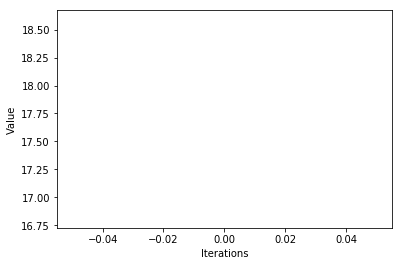

policy:  [[0.7548863  0.10892476 0.1361889 ]
 [0.44127735 0.3622092  0.19651346]
 [0.7405119  0.13956554 0.11992253]]
[0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.3, 1.0, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 1.0, 1.0, 0.3, 0.3, 1.0, 1.0, 0.2, 0.2, 0.3, 1.0, 1.0, 1.0, 1.0, 0.2, 1.0, 1.0, 0.3, 1.0]


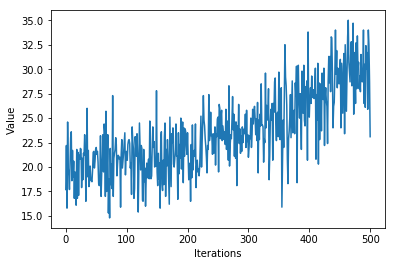

policy:  [[9.9707681e-01 7.2603929e-04 2.1971648e-03]
 [7.9537714e-01 1.1240811e-01 9.2214756e-02]
 [9.2174178e-01 4.9227726e-02 2.9030457e-02]]
[0.3, 0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


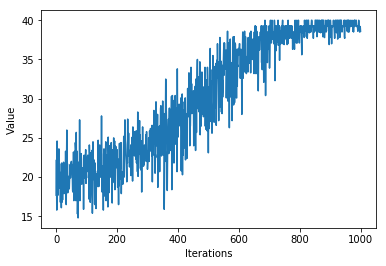

policy:  [[9.9995720e-01 2.5722507e-06 4.0248131e-05]
 [9.6302778e-01 1.6243471e-02 2.0728776e-02]
 [9.6501440e-01 2.7164755e-02 7.8208260e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


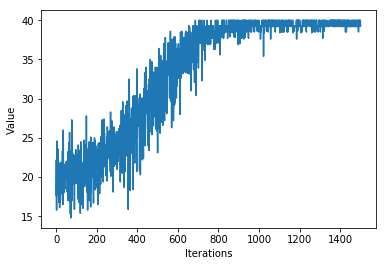

policy:  [[9.9999928e-01 8.8470218e-09 7.1943413e-07]
 [9.9360526e-01 2.0783574e-03 4.3163695e-03]
 [9.8358703e-01 1.4420619e-02 1.9923772e-03]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


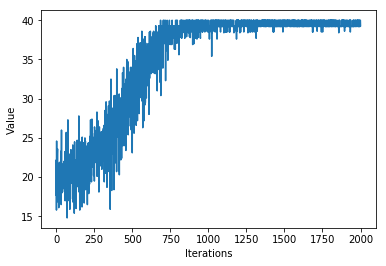

policy:  [[1.0000000e+00 3.0358136e-11 1.2807817e-08]
 [9.9892104e-01 2.5480040e-04 8.2417543e-04]
 [9.9171323e-01 7.7540060e-03 5.3275755e-04]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


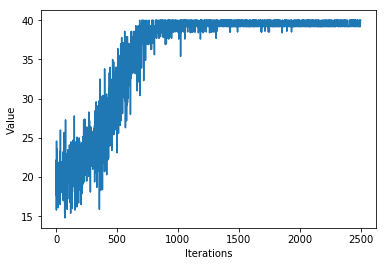

policy:  [[1.00000000e+00 1.04191714e-13 2.28080041e-10]
 [9.99814987e-01 3.07543050e-05 1.54285939e-04]
 [9.95770812e-01 4.08931915e-03 1.39894852e-04]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


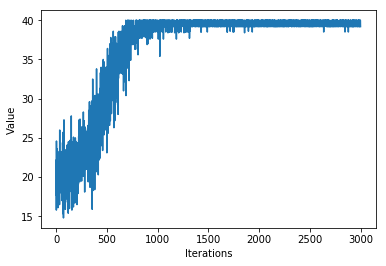

policy:  [[1.0000000e+00 3.5767533e-16 4.0627219e-12]
 [9.9996752e-01 3.7021755e-06 2.8773584e-05]
 [9.9762595e-01 2.3359191e-03 3.8129627e-05]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


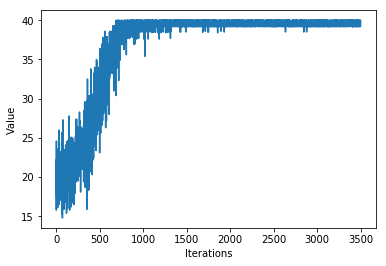

policy:  [[1.0000000e+00 1.2278486e-18 7.2368056e-14]
 [9.9999422e-01 4.4544404e-07 5.3620829e-06]
 [9.9869865e-01 1.2911258e-03 1.0213971e-05]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


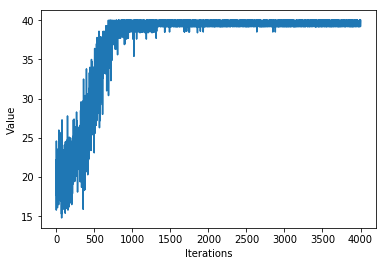

policy:  [[1.0000000e+00 4.2150297e-21 1.2890706e-15]
 [9.9999893e-01 5.3594341e-08 9.9922181e-07]
 [9.9929661e-01 7.0067414e-04 2.7102756e-06]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


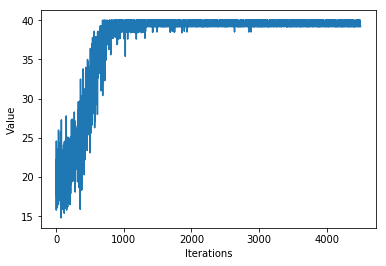

policy:  [[1.0000000e+00 1.4469598e-23 2.2961831e-17]
 [9.9999982e-01 6.4482610e-09 1.8620383e-07]
 [9.9962270e-01 3.7658736e-04 7.1559464e-07]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


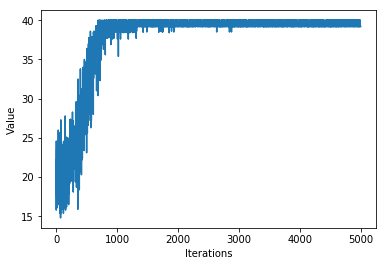

policy:  [[1.0000000e+00 4.9644604e-26 4.0878764e-19]
 [9.9999994e-01 7.7582901e-10 3.4698839e-08]
 [9.9979842e-01 2.0137071e-04 1.8844344e-07]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


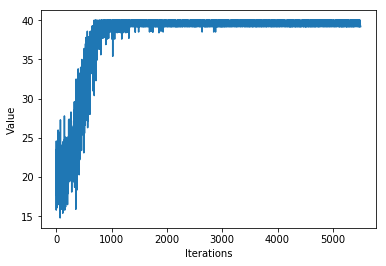

policy:  [[1.00000000e+00 1.70260416e-28 7.27467140e-21]
 [1.00000000e+00 9.33446306e-11 6.46608411e-09]
 [9.99892592e-01 1.07378946e-04 4.95533570e-08]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


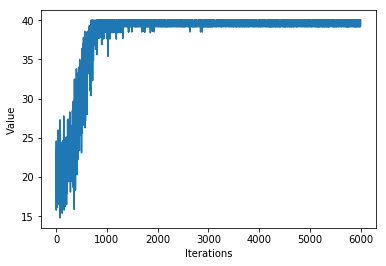

policy:  [[1.0000000e+00 5.8392263e-31 1.2945803e-22]
 [1.0000000e+00 1.1230851e-11 1.2049463e-09]
 [9.9994284e-01 5.7176690e-05 1.3021105e-08]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


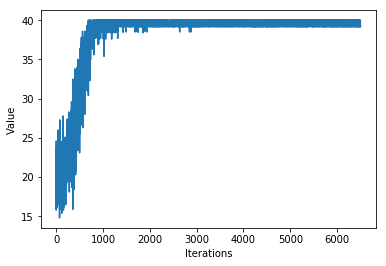

policy:  [[1.0000000e+00 2.0026126e-33 2.3037992e-24]
 [1.0000000e+00 1.3516814e-12 2.2461168e-10]
 [9.9996960e-01 3.0417526e-05 3.4197645e-09]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


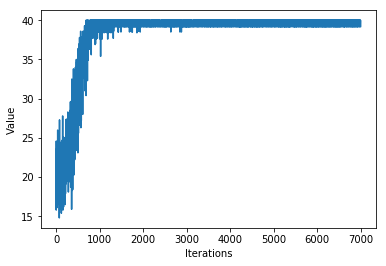

policy:  [[1.0000000e+00 6.8739500e-36 4.0997773e-26]
 [1.0000000e+00 1.6270644e-13 4.1876051e-11]
 [9.9998385e-01 1.6177935e-05 8.9810753e-10]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


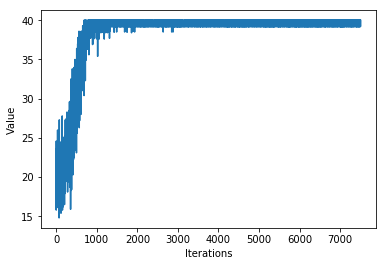

policy:  [[1.0000000e+00 2.3597294e-38 7.2958502e-28]
 [1.0000000e+00 1.9585521e-14 7.8072687e-12]
 [9.9999142e-01 8.6026139e-06 2.3584018e-10]]
[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


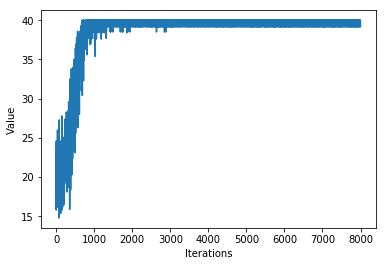

policy:  [[1.0000000e+00 8.1006262e-41 1.2983443e-29]
 [1.0000000e+00 2.3575705e-15 1.4555682e-12]
 [9.9999541e-01 4.5723714e-06 6.1906806e-11]]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


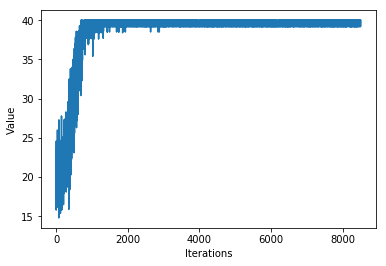

policy:  [[1.0000000e+00 2.7745710e-43 2.3105063e-31]
 [1.0000000e+00 2.8378870e-16 2.7137258e-13]
 [9.9999756e-01 2.4301780e-06 1.6250182e-11]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


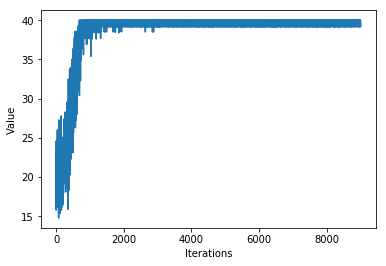

policy:  [[1.0000000e+00 1.4012985e-45 4.1116974e-33]
 [1.0000000e+00 3.4160601e-17 5.0594044e-14]
 [9.9999869e-01 1.2915987e-06 4.2655749e-12]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


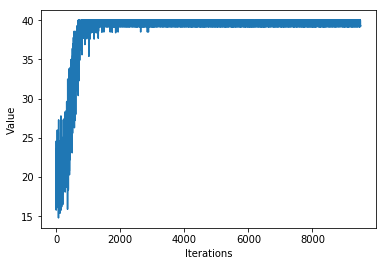

policy:  [[1.0000000e+00 0.0000000e+00 7.3170902e-35]
 [1.0000000e+00 4.1120265e-18 9.4326301e-15]
 [9.9999928e-01 6.8645608e-07 1.1196872e-12]]
[0.3, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


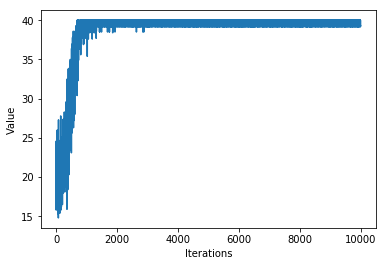

In [7]:
import torch

import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.t_policy = torch.autograd.Variable(torch.FloatTensor([[1 / 3 for x in range(3)] for y in range(3)]), #state action value
                                                requires_grad=True)
    def forward(self):
        policy = torch.nn.functional.log_softmax(self.t_policy)
        return policy


valuelist = []
rewards = np.array([10., 2., 3.]) / 10
model = Model()
optim = torch.optim.SGD([model.t_policy], lr=0.0001)
for i in range(10001):
    poli = torch.nn.functional.softmax(model.t_policy).data.numpy()
    state_action_list = []
    start_state = random.randint(0, 2)
    next_state = start_state
    rewardlist = []

    for k in range(40):
        rewardlist.append(rewards[next_state])
        action = np.random.choice(np.arange(0, 3), p=poli[next_state])
        state_action_list.append((next_state, action))
        next_state = action

    rew = gt(rewardlist[:], 0.99)
    grad_list = []
    for j, (state, action) in enumerate(state_action_list):
        value = model()
        value = -value[state, action] * rew  # -grad log p(s,a) G_t(s,a) (minus because we are minimizing)
        grad_list.append(value.view(1, -1))

    grads = torch.cat(grad_list, 0).mean()
    grads.backward()
    optim.step()
    value = (gt(rewardlist, 1))
    valuelist.append(value)

    if i % 500 == 0:
        print("policy: ",poli)
        print(rewardlist)
        plt.plot(valuelist)
        plt.xlabel('Iterations')
        plt.ylabel('Value')
        plt.show()


NameError: name 'valuelist' is not defined

# Value Iteration



In [23]:
import numpy as np

rewards = np.array([10., 2., 3.])

state_value_function = np.array([0 for i in range(3)])
print('V_{} = {}'.format(0, state_value_function))
for i in range(1000):
    s_v_f = state_value_function.copy()
    for s in range(3):
        state_value_function[s] = max(rewards[s] + 0.1 * state_value_function[s_prime] for s_prime in range(3))
    if i % 100 == 99:
        print('V_{} = {}'.format(i + 1, state_value_function))


V_0 = [0 0 0]
V_100 = [11  3  4]
V_200 = [11  3  4]
V_300 = [11  3  4]
V_400 = [11  3  4]
V_500 = [11  3  4]
V_600 = [11  3  4]
V_700 = [11  3  4]
V_800 = [11  3  4]
V_900 = [11  3  4]
V_1000 = [11  3  4]
